### Loading the IMDB dataset

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
# The variables train_data and test_data are lists of reviews; each review is a list of
# word indices (encoding a sequence of words). train_labels and test_labels are
# lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [6]:
#For kicks, here’s how you can quickly decode one of these reviews back to English words:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
# Encoding the integer sequences into a binary matrix

In [7]:
import numpy as np
# Creates an all-zero matrix of shape (len(sequences), dimension)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [11]:
# The model definition

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# Compiling the model

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Configuring the optimizer

In [16]:
from keras import optimizers
model.compile(  optimizer=optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

C:\Users\Mahira\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
# Using custom losses and metrics

In [18]:
from keras import losses
from keras import metrics
model.compile(  optimizer=optimizers.RMSprop(lr=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

In [19]:
# Setting aside a validation set

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [21]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
# It’ll be now trained the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), 
# in mini-batches of 512 samples. At the same time,
# it will be monitored loss and accuracy on the 10,000 samples that you set apart. We do so by
# passing the validation data as the validation_data argument.

In [24]:
# Training the model
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 11s 216ms/step - loss: 0.5029 - acc: 0.7875 - val_loss: 0.3890 - val_acc: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2993 - acc: 0.9023 - val_loss: 0.2985 - val_acc: 0.8902
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2194 - acc: 0.9265 - val_loss: 0.2761 - val_acc: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1725 - acc: 0.9426 - val_loss: 0.2730 - val_acc: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1413 - acc: 0.9537 - val_loss: 0.2797 - val_acc: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1148 - acc: 0.9638 - val_loss: 0.3394 - val_acc: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0964 - acc: 0.9697 - val_loss: 0.3110 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0785 -

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [26]:
# Plotting the training and validation loss

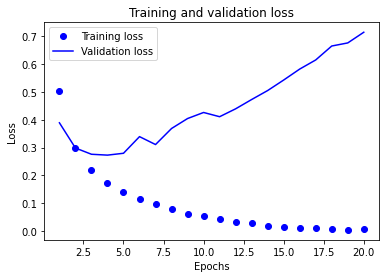

In [34]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Plotting the training and validation accuracy

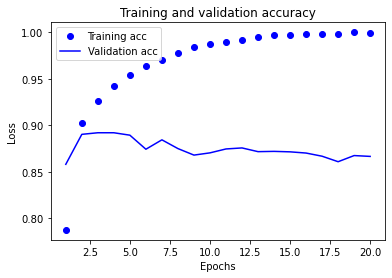

In [33]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Retraining a model from scratch

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 24ms/step - loss: 0.4690 - accuracy: 0.8176
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2688 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2063 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 8s 3ms/step - loss: 0.2897 - accuracy: 0.8854


In [37]:
results

[0.2897112965583801, 0.8854399919509888]

In [38]:
# Using a trained network to generate predictions on new data

In [39]:
model.predict(x_test)

782/782 [==============================] - 8s 3ms/step


array([[0.20592779],
       [0.9999141 ],
       [0.87418824],
       ...,
       [0.13606568],
       [0.08348037],
       [0.5932443 ]], dtype=float32)